In [0]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation


In [7]:
fashion_mnist = keras.datasets.fashion_mnist
(tr_image, tr_label),(te_image, te_label)=fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [8]:
tr_image.shape

(60000, 28, 28)

In [9]:
tr_label.shape

(60000,)

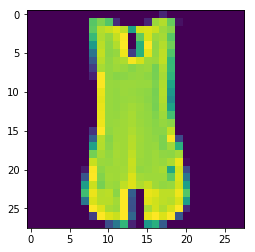

In [22]:
plt.figure()
plt.imshow(tr_image[4])
plt.show()

In [0]:
label_name=['Top','Pants','Pullover','Dress','Coat',
            'Sandle','Shirt','Sneaker','Bag','Shoes']

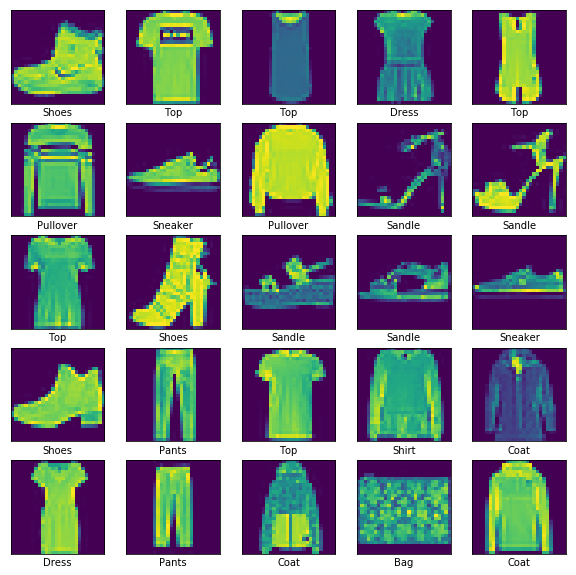

In [30]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(tr_image[i])
  plt.xlabel(label_name[tr_label[i]])
plt.show()


In [0]:
tr_image=tr_image.reshape(60000,784).astype('float32')/255.0
te_image=te_image.reshape(10000,784).astype('float32')/255.0

In [0]:
tr_label =np_utils.to_categorical(tr_label)
te_label =np_utils.to_categorical(te_label)

In [34]:
tr_label

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [0]:
val_image=tr_image[50000:]
val_label=tr_label[50000:]
tr_image=tr_image[:50000]
tr_label=tr_label[:50000]


In [48]:
val_image.shape

(10000, 784)

In [0]:
tr_rand=np.random.choice(50000,700)
val_rand=np.random.choice(10000,300)

tr_image=tr_image[tr_rand]
tr_label=tr_label[tr_rand]
val_image=val_image[val_rand]
val_label=val_label[val_rand]

2. 모델 구성하기

In [0]:
model=Sequential()
model.add(Dense(units=64, input_dim=28*28, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

3. 모델학습과정 설정하기
optimizer는 가중치를 찾아가는 방법(n 또는 dq/dw)

In [44]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

4. 모델 학습시키기

In [61]:
hist=model.fit(tr_image, tr_label, epochs=1000, batch_size=32, validation_data=(val_image, val_label))

Train on 700 samples, validate on 300 samples
Epoch 1/1000
700/700 [==============================] - 0s 68us/step - loss: 0.0010 - acc: 1.0000 - val_loss: 0.4720 - val_acc: 0.8800
Epoch 2/1000
700/700 [==============================] - 0s 60us/step - loss: 0.0010 - acc: 1.0000 - val_loss: 0.4720 - val_acc: 0.8800
Epoch 3/1000
700/700 [==============================] - 0s 61us/step - loss: 0.0010 - acc: 1.0000 - val_loss: 0.4721 - val_acc: 0.8800
Epoch 4/1000
700/700 [==============================] - 0s 60us/step - loss: 0.0010 - acc: 1.0000 - val_loss: 0.4721 - val_acc: 0.8800
Epoch 5/1000
700/700 [==============================] - 0s 60us/step - loss: 0.0010 - acc: 1.0000 - val_loss: 0.4721 - val_acc: 0.8800
Epoch 6/1000
700/700 [==============================] - 0s 60us/step - loss: 9.9943e-04 - acc: 1.0000 - val_loss: 0.4722 - val_acc: 0.8800
Epoch 7/1000
700/700 [==============================] - 0s 62us/step - loss: 9.9864e-04 - acc: 1.0000 - val_loss: 0.4725 - val_acc: 0.8800
E

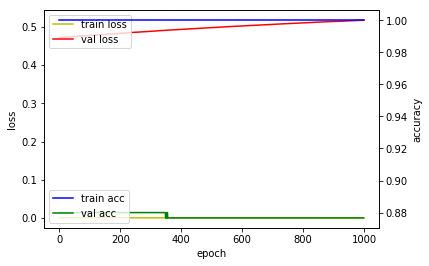

In [62]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax=plt.subplots()

acc_ax=loss_ax.twinx()

loss_ax.plot(hist.history['loss'],'y',label='train loss')
loss_ax.plot(hist.history['val_loss'],'r',label='val loss')

acc_ax.plot(hist.history['acc'],'b',label='train acc')
acc_ax.plot(hist.history['val_acc'],'g',label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [54]:
print('## training loss and acc #')
print(hist.history['loss'])
print(hist.history['acc'])

## training loss and acc #
[0.0044375455964888845, 0.004427977693932397, 0.004397088470203536, 0.004378765764912324, 0.0043572911207697225, 0.004348959183054311, 0.004325781985119517, 0.004296749431107726, 0.004278239208672728, 0.004271833242050239, 0.00423637199215591, 0.004230005617386528, 0.004199559439771941, 0.004176291356395398, 0.0041564179930303775, 0.004150168536497014, 0.004127093075907656, 0.004107746991461941, 0.004083224770479969, 0.004076990735317979, 0.004052700343807893, 0.004043140874377319, 0.004025937640773398, 0.004005181363650731, 0.0039681307306247094, 0.003959391497607742, 0.003947564481890627, 0.003939867904409766, 0.003920802066900901, 0.0038958812957363468, 0.003882734261985336, 0.0038727218205375333, 0.003846862094609865, 0.0038367823298488344, 0.003819538772638355, 0.0038095305993088653, 0.0037954631061958414, 0.00378117297110813, 0.003754797621763178, 0.003737312126904726, 0.003731549533217081, 0.003712010882528765, 0.0037024514017892736, 0.0036904428393713

6. 모델 평가하기

In [56]:
loss_and_acc=model.evaluate(te_image, te_label, batch_size=32)
print('## evaluation ##')
print(loss_and_acc)

10000/10000 [==============================] - 0s 21us/step
## evaluation ##
[0.5821176270484925, 0.8707]


7. 모델 사용하기


In [58]:
xhat = te_image
yhat = model.predict(xhat)
print('## yhat ##')
print(yhat)

## yhat ##
[[5.19826571e-10 4.09406294e-11 6.25246912e-08 ... 1.10238057e-03
  9.38394714e-06 9.98583198e-01]
 [5.75929304e-10 1.93354566e-14 9.99992013e-01 ... 2.27671568e-24
  3.59210627e-13 4.33420981e-26]
 [7.51137930e-10 1.00000000e+00 1.98146541e-10 ... 9.44724169e-17
  1.14683265e-17 8.70000296e-21]
 ...
 [5.19044215e-06 7.58818095e-12 3.01843393e-04 ... 3.36809201e-14
  9.99689102e-01 1.75347880e-15]
 [9.93496778e-12 9.99998450e-01 1.23580660e-11 ... 2.32078644e-11
  1.22549621e-13 2.00297695e-10]
 [1.92713379e-09 1.68163594e-09 3.08033236e-07 ... 1.05857762e-05
  1.32178542e-07 7.67107124e-08]]


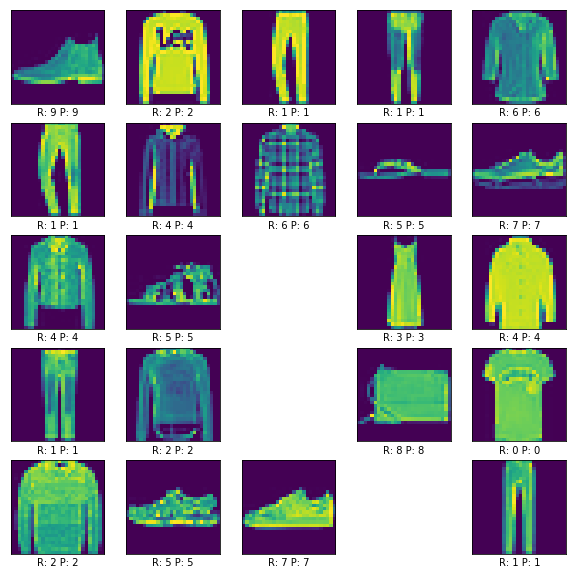

In [60]:


%matplotlib inline
import matplotlib.pyplot as plt



#plt_row = 10
#plt_col = 10


i = 0


plt.figure(figsize=(10,10))
for i in range(25):    
    if np.argmax(te_label[i]) == np.argmax(yhat[i]):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False) 
        plt.imshow(te_image[i].reshape(28, 28))
        plt.xlabel('R: ' + str(np.argmax(te_label[i])) + ' P: ' + str(np.argmax(yhat[i])))
        i += 1
      

plt.show()